In [81]:
import pandas as pd
import re
import numpy as np

# Load the data
customer_categories_df = pd.read_excel('Data/Customer Categories.xlsx')

In [82]:
import os

csv_folder = os.path.join(os.getcwd(), "csv_outputs")
json_folder = os.path.join(os.getcwd(), "json_outputs")

In [83]:
print("Columns:", customer_categories_df.columns.tolist())

Columns: ['CCAT_CODE', 'CCAT_DESC']


In [84]:
print("Sample data:\n", customer_categories_df.head())

Sample data:
    CCAT_CODE                       CCAT_DESC
0          0                         Unknown
1          0                         Unknown
2          1                  House accounts
3         10                              No
4         11  stock movemnt shipments/backup


In [85]:
print("Null values:\n", customer_categories_df.isnull().sum())

Null values:
 CCAT_CODE    0
CCAT_DESC    0
dtype: int64


In [86]:
# Remove rows with any null values
customer_categories_df = customer_categories_df.dropna()

In [87]:
print("Data shape:", customer_categories_df.shape)

Data shape: (51, 2)


STANDARDIZATION OF THE VALUES (GROUPINGS AND RENAMINGS)

In [88]:
unique_values = customer_categories_df['CCAT_DESC'].unique()
unique_values

array(['Unknown', 'House accounts', 'No',
       'stock movemnt shipments/backup', 'samples', 'sale goods',
       'Johannesburg CBDl', 'no', 'Pretoria East',
       'Pietersburg / Potgietersrus', 'Nelspruit / Tzaneen',
       'Pretoria Central', 'bad debts', 'CLOSED', 'Ermelo Pietretief',
       'Rustenburg Brits', 'Botswana trip excl Exports',
       'Exports incl Botswana', 'Speciality stores',
       'Gauteng North - Sandton', 'Gauteng East',
       'G North-N/ Randburg/Rivonia', 'Pretoria',
       'N- prov. Witbank Midd burg', 'Gaut.N-EastgateNorwoodMidr',
       'Free state', 'E Cape', 'Pretoria North/South /West', 'W cape/CT',
       'KZN/DBN', 'Midlands', 'Soweto Lenasia', '?', 'Vaal Triangle',
       'Krugersdorp Suncity', 'Potch KlerksD Kuruman',
       'kwz natal/DBN Deon', 'Consignment', 'Advertising Appro',
       'Departmentstore'], dtype=object)

In [89]:
ccat_map_revised = {
    # 1. CHANNEL (Revenue-generating Sales Methods)
    "Departmentstore": "Channel: Retail (Dept Store)",
    "Speciality stores": "Channel: Retail (Specialty)",
    "sale goods": "Channel: Retail",
    "Consignment": "Channel: Consignment",
    "Botswana trip excl Exports": "Channel: Export",
    "Exports incl Botswana": "Channel: Export",

    # 2. INTERNAL/OPERATIONAL (Non-Sales Activities)
    "House accounts": "Internal: House Account",
    "samples": "Internal: Sample",
    "stock movemnt shipments/backup": "Internal: Stock Movement",
    "Advertising Appro": "Internal: Advertising",
    "Advertising Appo.": "Internal: Advertising",
    "Advertising App": "Internal: Advertising",

    # 3. JUNK / INACTIVE DATA (Values to be filtered out)
    "bad debts": "Junk: Inactive/Bad Debt",
    "CLOSED": "Junk: Inactive/Bad Debt",
    "Unknown": "Junk: Unknown",
    "No": "Junk: Unknown",
    "no": "Junk: Unknown",
    "?": "Junk: Unknown",

    # 4. REDUNDANT DATA (All geographical/regional data that belongs in REGION_DESC)
    "Johannesburg CBDl": "Junk: Regional Code",
    "Pretoria East": "Junk: Regional Code",
    "Pietersburg / Potgietersrus": "Junk: Regional Code",
    "Nelspruit / Tzaneen": "Junk: Regional Code",
    "Pretoria Central": "Junk: Regional Code",
    "Ermelo Pietretief": "Junk: Regional Code",
    "Rustenburg Brits": "Junk: Regional Code",
    "Gauteng North - Sandton": "Junk: Regional Code",
    "Gauteng East": "Junk: Regional Code",
    "G North-N/ Randburg/Rivonia": "Junk: Regional Code",
    "Pretoria": "Junk: Regional Code",
    "N- prov. Witbank Midd burg": "Junk: Regional Code",
    "Gaut.N-EastgateNorwoodMidr": "Junk: Regional Code",
    "Free state": "Junk: Regional Code",
    "E Cape": "Junk: Regional Code",
    "Pretoria North/South /West": "Junk: Regional Code",
    "W cape/CT": "Junk: Regional Code",
    "KZN/DBN": "Junk: Regional Code",
    "Midlands": "Junk: Regional Code",
    "Soweto Lenasia": "Junk: Regional Code",
    "Vaal Triangle": "Junk: Regional Code",
    "Krugersdorp Suncity": "Junk: Regional Code",
    "Potch KlerksD Kuruman": "Junk: Regional Code",
    "kwz natal/DBN Deon": "Junk: Regional Code",
}

# 2. CREATE THE MISSING COLUMN ('CCAT_GROUP')
customer_categories_df['CCAT_GROUP'] = (
    customer_categories_df['CCAT_DESC']
    .map(ccat_map_revised)
)

# 3. DEFINE THE CATEGORIES TO DROP
drop_categories = [
    'Junk: Unknown',
    'Junk: Inactive/Bad Debt',
    'Junk: Regional Code'
]

# 4. FILTER AND REASSIGN (COMPLETELY DROP INVALID DATA)
customer_categories_df = customer_categories_df.loc[
    ~customer_categories_df['CCAT_GROUP'].isin(drop_categories)
].copy()

In [90]:
print("Cleaned data shape:", customer_categories_df.shape)

Cleaned data shape: (10, 3)


In [91]:
customer_categories_df

,CCAT_CODE,CCAT_DESC,CCAT_GROUP
2,1,House accounts,Internal: House Account
4,11,stock movemnt shipments/backup,Internal: Stock Movement
5,12,samples,Internal: Sample
6,13,sale goods,Channel: Retail
22,28,Botswana trip excl Exports,Channel: Export
23,29,Exports incl Botswana,Channel: Export
24,3,Speciality stores,Channel: Retail (Specialty)
46,5,Consignment,Channel: Consignment
47,6,Advertising Appro,Internal: Advertising
48,7,Departmentstore,Channel: Retail (Dept Store)


In [92]:
# Save CSV
csv_path = os.path.join(csv_folder, "customer_categories_df_clean.csv")
customer_categories_df.to_csv(csv_path, index=False)

# Save JSON
json_path = os.path.join(json_folder, "customer_categories_df_clean.json")
customer_categories_df.to_json(json_path, orient="records", lines=True)

VISUALIZATIONS

<Axes: ylabel='CCAT_DESC'>

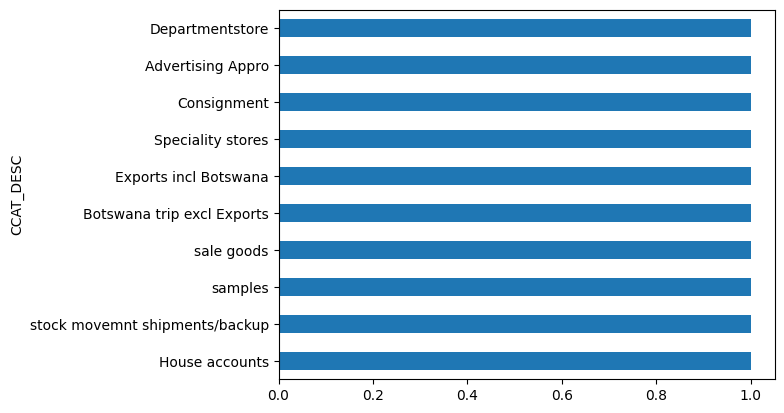

In [93]:
import matplotlib

customer_categories_df['CCAT_DESC'].value_counts().plot(kind='barh')

Customer Count by Cleaned Category

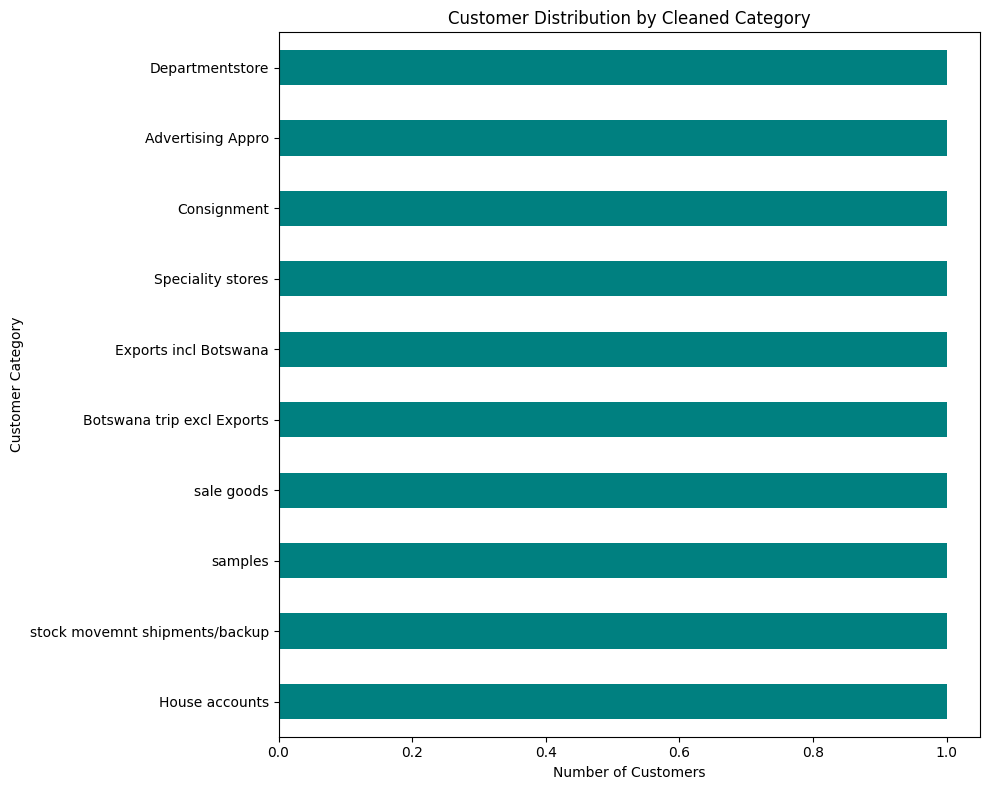

In [94]:
import matplotlib.pyplot as plt

customer_categories_df['CCAT_DESC'].value_counts().sort_values().plot(
    kind='barh', figsize=(10, 8), color='teal'
)
plt.title("Customer Distribution by Cleaned Category")
plt.xlabel("Number of Customers")
plt.ylabel("Customer Category")
plt.tight_layout()
plt.show()

#Category Distribution by Region

Top 10 Most Common CCAT_CODEs

In [95]:
code_to_desc = customer_categories_df.set_index('CCAT_CODE')['CCAT_DESC'].to_dict()
top_codes = customer_categories_df['CCAT_CODE'].value_counts().head(10)

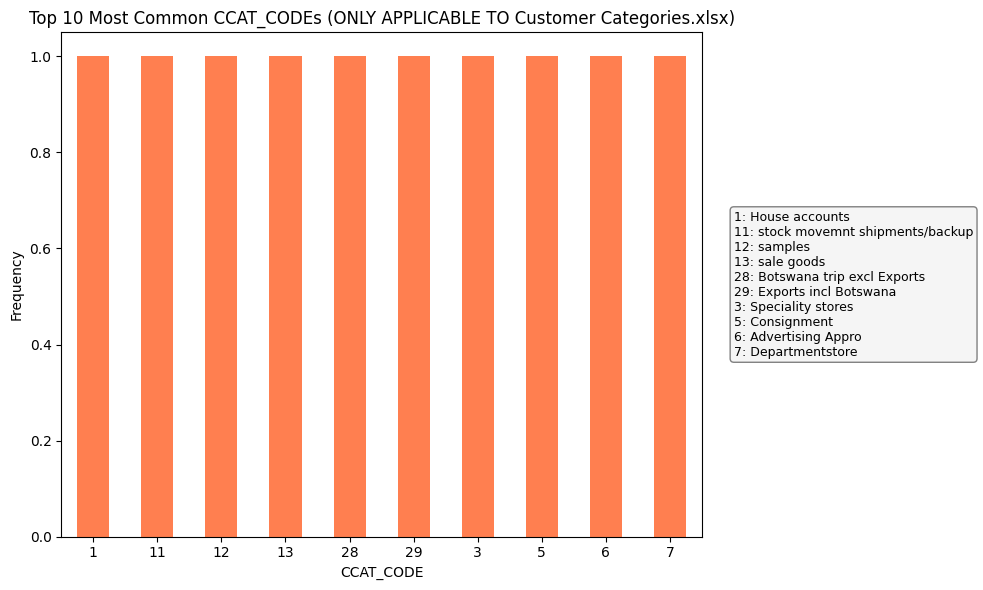

In [96]:
fig, ax = plt.subplots(figsize=(10, 6))
top_codes.plot(kind='bar', color='coral', ax=ax)

plt.title("Top 10 Most Common CCAT_CODEs (ONLY APPLICABLE TO Customer Categories.xlsx)")
plt.xlabel("CCAT_CODE")
plt.ylabel("Frequency")
plt.xticks(rotation=0)

# Create legend text
legend_text = "\n".join([f"{code}: {code_to_desc.get(code, 'Unknown')}" for code in top_codes.index])

# Add legend box to the side
props = dict(boxstyle='round', facecolor='whitesmoke', edgecolor='gray')

# Position the legend box outside the plot area
ax.text(1.05, 0.5, legend_text, transform=ax.transAxes,
        fontsize=9, verticalalignment='center', bbox=props)

plt.tight_layout()
plt.show()